# Read fort.67 Notebook
<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
from adcirc import adcirc
from IPython.display import HTML
import matplotlib.tri as tri
from mpl_toolkits.basemap import Basemap

In [2]:
root_dir = r'C:\Users\tmiesse\Work\temp2'
f67 = os.path.join(root_dir,'fort.67.nc')

In [13]:
netcdf_file = nc4.Dataset(f67)
lat1,lat2 = 34.059, 36.25
lon1,lon2 = -78.25, -75.05
levels = np.arange(-2, 8, 0.25)
title = 'Fort67'
netcdf_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    model: ADCIRC
    version: 51.52.38
    grid_type: Triangular
    description: nc_inundation_v9.35_MSL   ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: Interpolated from DEM2GRD.F90
    title: Irene tidal
    institution: Irene Run
    source: ADCIRC on Stampede
    history: Hindcast
    references: none
    comments: no comment
    host: none
    convention: no comment
    Conventions: UGRID-0.9.0
    contact: tmiesse@gmu.edu
    creation_date: 2018-09-13  9:48:58 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.5
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 5
    ncor: 1
    ntip: 1
    nws: 0
    statim: 0.0
    reftim: 0.0
    slam0: -79.0
    sfea0: 35.0
    cori: 0.0
    ntif: 8
    nbfr: 8
    rundes: nc_inundation_v9.35_MSL   ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: adc47_r131   EqTides      ! 20 CHARACTER ALPANUMER

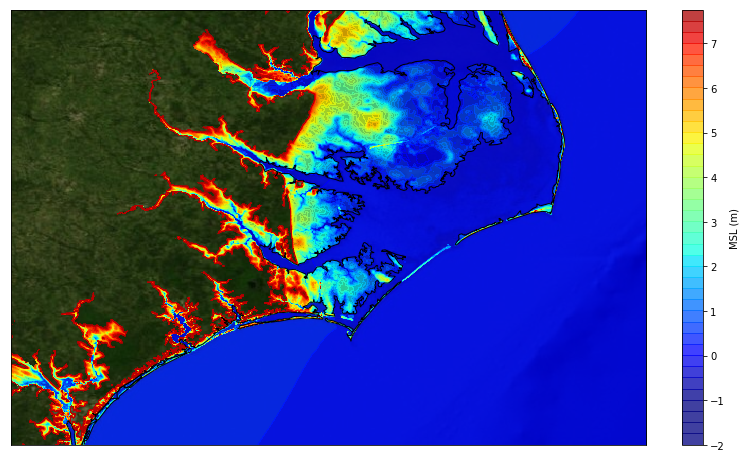

In [17]:
fig,ax = plt.subplots(figsize=(16,8))
xx = netcdf_file.variables['x'][:]
yy = netcdf_file.variables['y'][:]
gridvars = netcdf_file.variables      
var_element = 'element'
elems = gridvars[var_element][:,:]-1
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269)
data1 = netcdf_file.variables['zeta1'][0,:]
triang = tri.Triangulation(xx,yy, triangles=elems)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=600, verbose= False)
m.drawcoastlines(color='k')
if data1.mask.any():
    point_mask_indices = np.where(data1.mask)
    tri_mask = np.any(np.in1d(elems, point_mask_indices).reshape(-1, 3), axis=1)
    triang.set_mask(tri_mask)
plt.xlim([lon1, lon2])
plt.ylim([lat1, lat2])    
plt.tricontourf(triang, data1, levels=levels,alpha=0.75,vmin=-1, vmax=8, aspect='auto',cmap='jet')
cb=plt.colorbar(cmap='jet',fraction=0.026,pad=0.04) 
cb.set_label('MSL (m)')
#plt.title(title + '\n')
#plt.savefig('max_WL.png',dpi=500, bbox_inches = 'tight', pad_inches = 0.1)
#plt.close()
plt.show(fig)

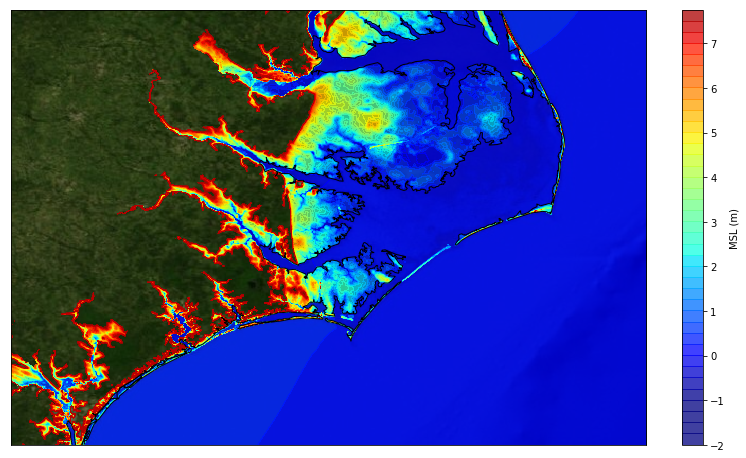

In [18]:
fig,ax = plt.subplots(figsize=(16,8))
xx = netcdf_file.variables['x'][:]
yy = netcdf_file.variables['y'][:]
gridvars = netcdf_file.variables      
var_element = 'element'
elems = gridvars[var_element][:,:]-1
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269)
data1 = netcdf_file.variables['zeta2'][0,:]
triang = tri.Triangulation(xx,yy, triangles=elems)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=600, verbose= False)
m.drawcoastlines(color='k')
if data1.mask.any():
    point_mask_indices = np.where(data1.mask)
    tri_mask = np.any(np.in1d(elems, point_mask_indices).reshape(-1, 3), axis=1)
    triang.set_mask(tri_mask)
plt.xlim([lon1, lon2])
plt.ylim([lat1, lat2])    
plt.tricontourf(triang, data1, levels=levels,alpha=0.75,vmin=-1, vmax=8, aspect='auto',cmap='jet')
cb=plt.colorbar(cmap='jet',fraction=0.026,pad=0.04) 
cb.set_label('MSL (m)')
#plt.title(title + '\n')
#plt.savefig('max_WL.png',dpi=500, bbox_inches = 'tight', pad_inches = 0.1)
#plt.close()
plt.show(fig)

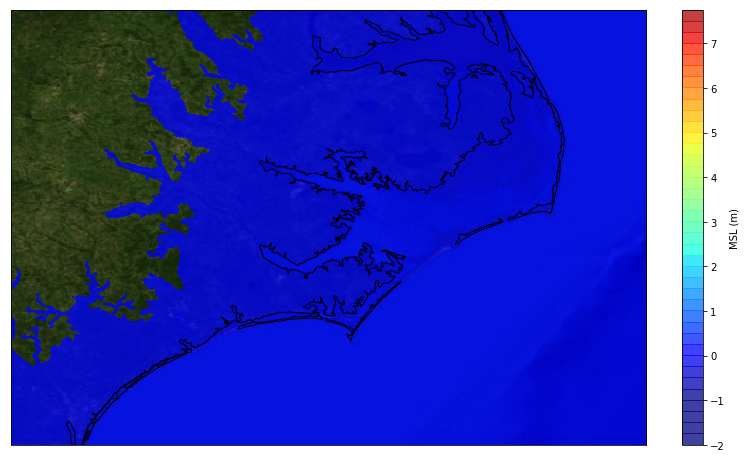

In [19]:
fig,ax = plt.subplots(figsize=(16,8))
xx = netcdf_file.variables['x'][:]
yy = netcdf_file.variables['y'][:]
gridvars = netcdf_file.variables      
var_element = 'element'
elems = gridvars[var_element][:,:]-1
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269)
data1 = netcdf_file.variables['zetad'][0,:]
triang = tri.Triangulation(xx,yy, triangles=elems)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=600, verbose= False)
m.drawcoastlines(color='k')
if data1.mask.any():
    point_mask_indices = np.where(data1.mask)
    tri_mask = np.any(np.in1d(elems, point_mask_indices).reshape(-1, 3), axis=1)
    triang.set_mask(tri_mask)
plt.xlim([lon1, lon2])
plt.ylim([lat1, lat2])    
plt.tricontourf(triang, data1, levels=levels,alpha=0.75,vmin=-1, vmax=8, aspect='auto',cmap='jet')
cb=plt.colorbar(cmap='jet',fraction=0.026,pad=0.04) 
cb.set_label('MSL (m)')
#plt.title(title + '\n')
#plt.savefig('max_WL.png',dpi=500, bbox_inches = 'tight', pad_inches = 0.1)
#plt.close()
plt.show(fig)